# 3/4/21 - This notebook analyzes the best fits of G250289_2730 to extract mass content and M/L ratios.


In [2]:
### libraries
%matplotlib inline
# set workspace path
from pyprojroot import here
workspace_path = str(here())#'/data/sknabel/autolens_workspace'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
#from astropy.stats import sigma_clip as clip
import astropy.cosmology as cosmo
from os import path
import time

# set datetime variable
datetime = time.strftime("%d%m%Y-%H%M%S")

# paths
autoz_path = '/data/sknabel/autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'

In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

/data/sknabel/autoz_lens_model
Working Directory has been set to `/data/sknabel/autoz_lens_model`


In [4]:
# this should be constant across experiments

gama_id = 250289
links_id = 2730

object_folder = f'{fits_path}G{gama_id}_{links_id}/'
output_folder = f'{autoz_path}output/G{gama_id}_{links_id}/'

# load object data table
links = pd.read_csv(f'{csv_path}/latest/links_sample_latest.csv')
lens_galaxy_data = links[links.GAMA_ID == gama_id]
stellar_mass = lens_galaxy_data.lambdar_log_mstar.values
zlens=lens_galaxy_data.zlens.values
zsource=lens_galaxy_data.zsource.values
einstein_radius=np.mean([lens_galaxy_data.theta_e_pm.values, lens_galaxy_data.theta_e_sis.values]) # take average of einstein radius estimates for prior
print(f'Lens and source redshifts at {zlens} and {zsource}.')
print(f'Einstein radius prior: {einstein_radius}')

# load performance log from csv
performance_log = pd.read_csv(f'{csv_path}G{gama_id}_{links_id}_performance_log.csv')
#print(performance_log)
print(f'Performance log: {performance_log}')

INFO:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Lens and source redshifts at [0.40121394] and [0.71961558].
Einstein radius prior: 0.7818634676165951
Performance log:     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
0            0           0.0             0.0   
1            1           1.0             1.0   
2            2           2.0             2.0   
3            3           3.0             3.0   
4            4           4.0             4.0   
5            5           5.0             5.0   
6            6           6.0             6.0   
7            7           7.0             7.0   
8            8           8.0             8.0   
9            9           9.0             9.0   
10          10          10.0            10.0   
11          11          11.0            11.0   
12          12          12.0            12.0   
13          13          13.0            13.0   
14          14          14.0            14.0   
15          15          15.0            15.0   
16          16          16.0            16.0   
17          17   

In [12]:
# set up aggregator to examine the results on Experiment 3-2
agg = af.Aggregator(directory=f'{output_folder}experiment_1-12_3positions1pt0_p1_60nlive_tighter_tolerance_phase2_fit_25022021-074005')

samples_gen = agg.values("samples")

"""
When we print this the length of this generator converted to a list of outputs we see 3 different NestSamples 
instances. These correspond to each fit of each phase to each of our 3 images.
"""
print("NestedSampler Samples: \n")
print(samples_gen)
print()
print("Total Samples Objects = ", len(list(samples_gen)), "\n")

# Or do this
samples = list(agg.values("samples"))

print(samples[0].max_log_likelihood_vector)
print(samples[0].max_log_posterior_vector)

Aggregator loading phases... could take some time.

 A total of 1 phases and results were found.
NestedSampler Samples: 


Total Samples Objects =  1 

[0.09308840995790608, 0.030222438158616072, -0.06817823985998944, 791085293021575.5, 0.06862340933761546, -0.15798177426472604, 0.05767596612560465, 0.7761391986370466]
[1.0037691547054026e-06, 0.01087800062805359, -0.03255395543450698, 837641501593496.9, 1.014361216813481, -0.7458635842216976, 1.9457487894318892, 0.06357251915870725]


In [11]:
# These for loops are if I have several models to analyze at once.
for samples in agg.values("samples"):
    print("All parameters of the very first sample")
    print(samples.parameters[0])
    print("The third parameter of the tenth sample")
    print(samples.parameters[9][2])

All parameters of the very first sample
[0.00017576105850682455, 0.09258897318605636, -0.139910182138992, 599425470987037.4, -0.10613573688991895, -0.11018695968911718, 3.5371181282435127, 3.915055878897926]
The third parameter of the tenth sample
0.023566989606799607


In [28]:
for samples in agg.values("samples"):
    print("log(likelihood), log(prior), log(posterior) and weight of the 1462nd sample.")
    print(samples.log_likelihoods[1462])
    print(samples.log_priors[1462])
    print(samples.log_posteriors[1462])
    print(samples.weights[1462])

log(likelihood), log(prior), log(posterior) and weight of the 1462nd sample.
148.984655118735
5.455555304586613
154.44021042332162
4.23332394479896e-43


In [20]:
for samples in agg.values("samples"):
    model = samples.model
    print(model)
    print(model.parameter_names)
    print(model.parameter_labels)

Galaxy (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (mass_to_light_ratio, LogUniformPrior, lower_limit = 1e-06, upper_limit = 1000000.0), (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (mass_at_200, LogUniformPrior, lower_limit = 100000000.0, upper_limit = 1000000000000000.0), Galaxy (centre_0, UniformPrior, lower_limit = -3.0, upper_limit = 3.0), (centre_1, UniformPrior, lower_limit = -3.0, upper_limit = 3.0), (intensity, UniformPrior, lower_limit = 0.0, upper_limit = 4.589990245094409), (effective_radius, UniformPrior, lower_limit = 0.0, upper_limit = 5.0), None, None
['mass_to_light_ratio', 'centre_0', 'centre_1', 'mass_at_200', 'centre_0', 'centre_1', 'effective_radius', 'intensity']
['Psi', 'y', 'x', 'm200', 'y', 'x', 'R', 'I']


In [71]:
ml_instances = [samps.max_log_likelihood_instance for samps in agg.values("samples")]
print("Maximum Log Likelihood Model Instances: \n")
print(ml_instances[0], "\n")

print(ml_instances[0].galaxies)
print(ml_instances[0].galaxies.lens.dark.mass_at_200)

# what about ml_models? I want errors!

Maximum Log Likelihood Model Instances: 


791085293021575.5


In [46]:
results = agg.model_results
print("Model Results Summary: \n")
print(results, "\n")

Model Results Summary: 



Bayesian Evidence                                                                         229.61959732
Maximum Likelihood                                                                        276.48042397

Maximum Log Likelihood Model:

galaxies
    lens
        bulge
            mass_to_light_ratio                                                           0.093
        dark
            centre
                centre_0                                                                  0.030
                centre_1                                                                  -0.068
            mass_at_200                                                                   791085293021575.500
    source
        bulge
            centre
                centre_0                                                                  0.069
                centre_1                                                                  -0.158
            effective_radius       

## Try to pull Einstein radius from lens galaxy and grid.

In [51]:
lens = ml_instances[0].galaxies.lens
grid = al.Grid2D.uniform(shape_native=(101, 101), pixel_scales=0.2)

print(
    "Einstein Radius (arcsec) via Galaxy = ",
    lens.einstein_radius_from_grid(grid=grid),
)
print(
    "Einstein Mass (angular) via Galaxy = ",
    lens.einstein_mass_angular_from_grid(grid=grid),
)

kpc_per_arcsec = al.util.cosmology.kpc_per_arcsec_from(
    redshift=zlens, cosmology=cosmo.Planck15
)

einstein_radius = lens.einstein_radius_from_grid(grid=grid)

einstein_radius_kpc = einstein_radius * kpc_per_arcsec
print("Einstein Radius (kpc) = ", einstein_radius_kpc)

Einstein Radius (arcsec) via Galaxy =  1.5341188204096299
Einstein Mass (angular) via Galaxy =  7.393802886084795
Einstein Radius (kpc) =  [4.33792478]


## Einstein mass.

In [64]:
einstein_mass = lens.einstein_mass_angular_from_grid(grid=grid)
print("Einstein Mass (angular) = ", einstein_mass)

critical_surface_density = al.util.cosmology.critical_surface_density_between_redshifts_from(
    redshift_0=0.5, redshift_1=1.0, cosmology=cosmo.Planck15
)

einstein_mass_kpc = einstein_mass * critical_surface_density

print("Einstein Mass (kpc) = ", einstein_mass_kpc) # Gives it in solar masses
print("Einstein Mass (kpc) = ", "{:.4e}".format(einstein_mass_kpc))
print(f'Log Einstein Mass = {np.log10(einstein_mass_kpc)}')

Einstein Mass (angular) =  7.393802886084795
Einstein Mass (kpc) =  877659870065.8164
Einstein Mass (kpc) =  8.7766e+11
Log Einstein Mass = 11.943326241221566


In [63]:
print(f'Log Mass at 200 (whatever that means): {np.log10(791085293021575.5)}')

Mass at 200 (whatever that means): 14.898223310667886


In [67]:
print(f'Log Stellar Mass: {stellar_mass}')

Log Stellar Mass: [11.668818]


In [73]:
"""
We can compute the model parameters at a given sigma value (e.g. at 3.0 sigma limits).
These parameter values do not account for covariance between the model. For example if two parameters are degenerate 
this will find their values from the degeneracy in the `same direction` (e.g. both will be positive). we'll cover
how to handle covariance in a later tutorial.
Here, I use "uv3" to signify this is an upper value at 3 sigma confidence,, and "lv3" for the lower value.
"""

# What is this shit?

uv3_vectors = [
    samps.vector_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

uv3_instances = [
    samps.instance_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

lv3_vectors = [
    samps.vector_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

lv3_instances = [
    samps.instance_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

print("Errors Lists: \n")
print(uv3_vectors, "\n")
print(lv3_vectors, "\n")
print("Errors Instances: \n")
print(uv3_instances, "\n")
print(lv3_instances, "\n")

"""
We can compute the upper and lower errors on each parameter at a given sigma limit.
Here, "ue3" signifies the upper error at 3 sigma. 
"""
ue3_vectors = [
    samps.error_vector_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

ue3_instances = [
    samps.error_instance_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

le3_vectors = [
    samps.error_vector_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]
le3_instances = [
    samps.error_instance_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

print("Errors Lists: \n")
print(ue3_vectors, "\n")
print(le3_vectors, "\n")
print("Errors Instances: \n")
print(ue3_instances, "\n")
print(le3_instances, "\n")


Errors Lists: 

[[0.8173067426239591, 0.04021798840601211, -0.033342525992155, 879288648835713.9, 0.19709277509098203, -0.14642607130805105, 0.34974483251846905, 0.8510078682579594]] 

[[0.06984749043348215, 0.0007692959136734359, -0.07901842424946834, 3848276224379.9424, 0.05364187580762448, -0.4653097369418179, 0.054082021927004904, 0.30278499280729365]] 

Errors Instances: 



Errors Lists: 

[[0.48271814087369697, 0.017846717624539078, 0.025317577487654425, 605372505839173.5, 0.09539364078054852, 0.10978456953822732, 0.20409101309696687, 0.2931916258457593]] 

[[0.26474111131677996, 0.021601974867799596, 0.020358320769658912, 270067866772160.5, 0.04805725850280903, 0.2090990960955395, 0.09157179749449729, 0.2550312496049064]] 

Errors Instances: 





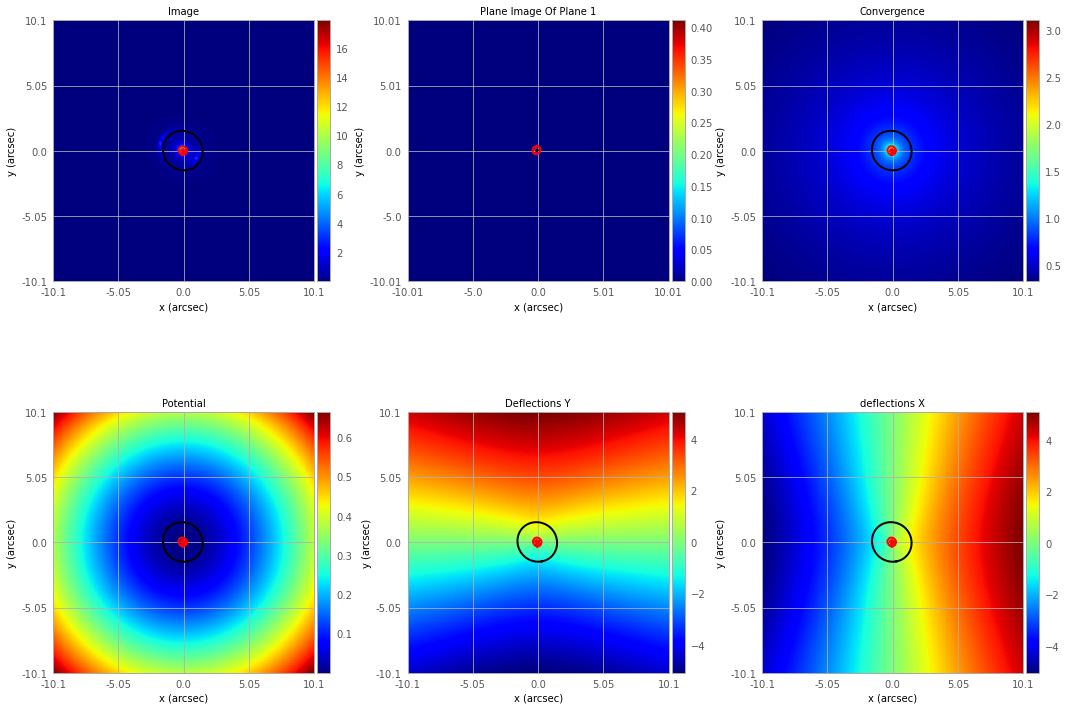

In [82]:
ml_tracer = al.Tracer.from_galaxies(galaxies=ml_instances[0].galaxies)

tracer_plotter = aplt.TracerPlotter(tracer=ml_tracer, grid=grid)
tracer_plotter.subplot_tracer()

In [85]:
"""
We can also access the `median pdf` model, which is the model computed by marginalizing over the samples of every 
parameter in 1D and taking the median of this PDF.
"""
mp_vector = samples.median_pdf_vector
mp_instance = samples.median_pdf_instance

print("Median PDF Model Parameter Lists: \n")
print(mp_vector, "\n")
print("Most probable Model Instances: \n")
print(mp_instance, "\n")
print(mp_instance.galaxies.lens)
print()

Median PDF Model Parameter Lists: 

[0.3345886017502621, 0.02237127078147303, -0.058660103479809426, 273916142996540.44, 0.10169913431043351, -0.25621064084627837, 0.14565381942150218, 0.5578162424122001] 

Most probable Model Instances: 


Redshift: [0.40121394]
Light Profiles:
EllipticalSersic
centre: (0.02237127078147303, -0.058660103479809426)
elliptical_comps: (-0.09652741926566069, 0.0032931864035581383)
axis_ratio: 0.8238463881508825
phi: -44.023010621171096
mass_to_light_ratio: 0.3345886017502621
intensity: 0.4589990245094409
effective_radius: 1.1540901740321086
sersic_index: 3.4350260950409943
id: 1213781
_assertions: []
cls: <class 'autogalaxy.profiles.light_and_mass_profiles.EllipticalSersic'>
Mass Profiles:
EllipticalSersic
centre: (0.02237127078147303, -0.058660103479809426)
elliptical_comps: (-0.09652741926566069, 0.0032931864035581383)
axis_ratio: 0.8238463881508825
phi: -44.023010621171096
mass_to_light_ratio: 0.3345886017502621
intensity: 0.4589990245094409
effective_r

In [87]:
"""
The maximum log likelihood of each model fit and its Bayesian log evidence (estimated via the nested sampling 
algorithm) are also available.
"""
print("Maximum Log Likelihood and Log Evidence: \n")
print(max(samples.log_likelihoods))
print(samples.log_evidence)


Maximum Log Likelihood and Log Evidence: 

276.4804239653563
229.61959732224582


## Trying to make a method for using this the way I need it.

In [95]:
for samples in agg.values("samples"):
    samples = samples

In [135]:
# staring parameters
print(f'Starting parameters: {samples.parameters[0]}', '\n')

# beginning model and parameter names
model = samples.model
print(f'Model: {model}', '\n')
print(f"Model parameter names: {model.parameter_names}", '\n')

# max log likelihood sample
ml_sample = samples.max_log_likelihood_sample
print(f'Max log likelihood: {ml_sample.log_likelihood}')
print()

# contents (instance) of max log likelihood
ml_instance = samples.max_log_likelihood_instance
lens = ml_instance.galaxies.lens
source = ml_instance.galaxies.source
print(f'Lens parameters: {ml_instance.galaxies.lens}')
print(f'Fit parameters: {samples.max_log_likelihood_vector}')

print()

# einstein radius
grid = al.Grid2D.uniform(shape_native=(101, 101), pixel_scales=0.2)
einstein_radius = lens.einstein_radius_from_grid(grid=grid)
print(
    "Einstein Radius (arcsec) via Galaxy = ",
    einstein_radius,
)

kpc_per_arcsec = al.util.cosmology.kpc_per_arcsec_from(
    redshift=zlens, cosmology=cosmo.Planck15
)

einstein_radius_kpc = einstein_radius * kpc_per_arcsec
print("Einstein Radius (kpc) = ", einstein_radius_kpc)

print()

#einstein mass
einstein_mass = lens.einstein_mass_angular_from_grid(grid=grid)
print("Einstein Mass (angular) = ", einstein_mass)

critical_surface_density = al.util.cosmology.critical_surface_density_between_redshifts_from(
    redshift_0=0.5, redshift_1=1.0, cosmology=cosmo.Planck15
)

einstein_mass_kpc = einstein_mass * critical_surface_density

print("Einstein Mass (kpc) = ", einstein_mass_kpc) # Gives it in solar masses
print("Einstein Mass (kpc) = ", "{:.4e}".format(einstein_mass_kpc))
print(f'Log Einstein Mass = {np.log10(einstein_mass_kpc)}')
print()
print(f'Log Stellar Mass: {stellar_mass}')
print(f'DM Log Mass at 200 (whatever that means): {np.log10(791085293021575.5)}')

# errors

# upper and lower parameter values at 3sigma confidence
print()
uv3_vectors = [
    samples.vector_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

uv3_instances = [
    samples.instance_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

lv3_vectors = [
    samples.vector_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

lv3_instances = [
    samples.instance_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

print("Errors Lists: 3-sigma confidence ")
print(f'Upper value: {uv3_vectors}')
print(f'Lower value: {lv3_vectors}')
#print("Errors Instances:")
#print(uv3_instances)
#print(lv3_instances)

ue3_vectors = [
    samples.error_vector_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]
ue3_instances = [
    samples.error_instance_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]
le3_vectors = [
    samples.error_vector_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]
le3_instances = [
    samples.error_instance_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

print(f'Upper error: {ue3_vectors}')
print(f'Lower error: {le3_vectors}')
#print("Errors Instances: ")
#print(ue3_instances)
#print(le3_instances)


Starting parameters: [0.00017576105850682455, 0.09258897318605636, -0.139910182138992, 599425470987037.4, -0.10613573688991895, -0.11018695968911718, 3.5371181282435127, 3.915055878897926] 

Model: Galaxy (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (mass_to_light_ratio, LogUniformPrior, lower_limit = 1e-06, upper_limit = 1000000.0), (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (mass_at_200, LogUniformPrior, lower_limit = 100000000.0, upper_limit = 1000000000000000.0), Galaxy (centre_0, UniformPrior, lower_limit = -3.0, upper_limit = 3.0), (centre_1, UniformPrior, lower_limit = -3.0, upper_limit = 3.0), (intensity, UniformPrior, lower_limit = 0.0, upper_limit = 4.589990245094409), (effective_radius, UniformPrior, lower_limit = 0.0, upper_limit = 5.0), None, None 

Model parameter names: ['mass_to_light_ratio', 'centre_0', 'centre_1', 'mass_at_200', 'centre_0', 'centre_1

In [144]:
samples.max_log_likelihood_vector

[0.09308840995790608,
 0.030222438158616072,
 -0.06817823985998944,
 791085293021575.5,
 0.06862340933761546,
 -0.15798177426472604,
 0.05767596612560465,
 0.7761391986370466]

In [155]:
results = agg.model_results
print("Model Results Summary: \n")
print(results, "\n")

Model Results Summary: 



Bayesian Evidence                                                                         229.61959732
Maximum Likelihood                                                                        276.48042397

Maximum Log Likelihood Model:

galaxies
    lens
        bulge
            mass_to_light_ratio                                                           0.093
        dark
            centre
                centre_0                                                                  0.030
                centre_1                                                                  -0.068
            mass_at_200                                                                   791085293021575.500
    source
        bulge
            centre
                centre_0                                                                  0.069
                centre_1                                                                  -0.158
            effective_radius       

In [167]:
ue3_vectors = [
    samples.gaussian_priors_at_sigma(sigma=3.0) for samples in agg.values("samples")
]
print(ue3_vectors)

[[(0.3345886017502621, 0.48271814087369697), (0.02237127078147303, 0.021601974867799596), (-0.058660103479809426, 0.025317577487654425), (273916142996540.44, 605372505839173.5), (0.10169913431043351, 0.09539364078054852), (-0.25621064084627837, 0.2090990960955395), (0.14565381942150218, 0.20409101309696687), (0.5578162424122001, 0.2931916258457593)]]


<GalaxyModel Galaxy (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (mass_to_light_ratio, LogUniformPrior, lower_limit = 1e-06, upper_limit = 1000000.0), (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (mass_at_200, LogUniformPrior, lower_limit = 100000000.0, upper_limit = 1000000000000000.0)>